In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


**[FILLOUT] Specify the CSV file name that you want to use for further analysis**  <br>
*DELETE THIS TEXT SECTION BEFORE SUBMITTING*

In [2]:
csv_file_name = "Crime in Bangladesh.csv"


In [3]:
df = pd.read_csv( csv_file_name )
df.head(5)

,Year,Unit_Name,Dacoity,Robber,Murder,Speedy Trial,Riot,Women&Children_Represion,Kidnapping,Police_Assult,Burglary,Theft,Other_cases,Arms_act,Explosive_act,Narcotic_act,Smuggling,Tot(arm+exp+nar+smu),Total
0,2010,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,11279,23519
1,2010,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,1016,4063
2,2010,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,826,1767
3,2010,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,587,1571
4,2010,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,289,1139


In [4]:
df.columns

Index(['Year', 'Unit_Name', 'Dacoity', 'Robber', 'Murder', 'Speedy Trial',
       'Riot', 'Women&Children_Represion', 'Kidnapping', 'Police_Assult',
       'Burglary', 'Theft', 'Other_cases', 'Arms_act', 'Explosive_act',
       'Narcotic_act', 'Smuggling', 'Tot(arm+exp+nar+smu)', 'Total'],
      dtype='object')

In [5]:
target_column_name = "Total"

In [6]:
#categorical_target_column = True
categorical_target_column = False


In [7]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 180
Total Number of Columns : 19


In [8]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

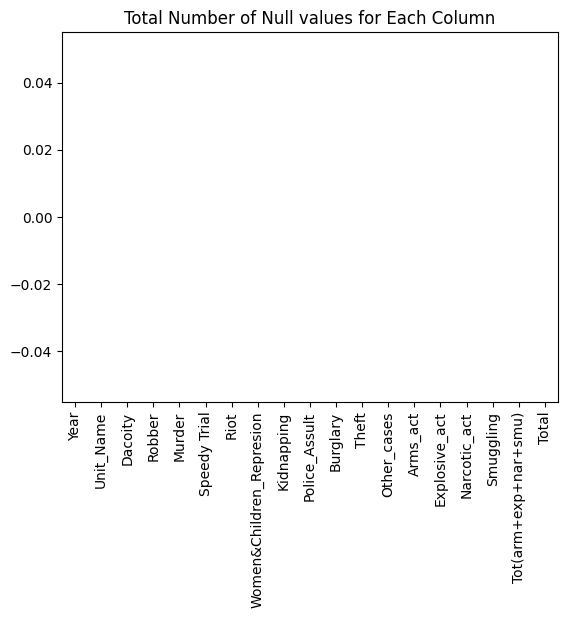

In [9]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [10]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Year                        0.0
Unit_Name                   0.0
Dacoity                     0.0
Robber                      0.0
Murder                      0.0
Speedy Trial                0.0
Riot                        0.0
Women&Children_Represion    0.0
Kidnapping                  0.0
Police_Assult               0.0
Burglary                    0.0
Theft                       0.0
Other_cases                 0.0
Arms_act                    0.0
Explosive_act               0.0
Narcotic_act                0.0
Smuggling                   0.0
Tot(arm+exp+nar+smu)        0.0
Total                       0.0
dtype: float64

OBSERVATION

---


Most of the data points from the column "Cabin" are missing. As **77%** of the data points are missing , the column cannot be taken in consideration for further analysis.

The "Age" Column has some missing values. Around 19% of the data are missing. The null values can be handeled by using different teachniques such as BackFill / FrontFill .

*This is just a sample analysis. Modify and rewrite the sample text according to your dataset*

**[FILLOUT] Drop unwanted columns such as Unique Indentifiers or Columns that have high Null value count**

Replace Column Names with the column names that you want to drop.
Here I have dropped "PassengerId" because It is an unique Indentifier and doest aid in any analysis.
I also have dropped "Cabin" because It has high Null value count <br>

!!! You might not consider dropping any columns if you think every column is equally important. !!!

*DELETE THIS TEXT SECTION BEFORE SUBMITTING*

In [11]:
droped_column_names = [ "Tot(arm+exp+nar+smu)"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [12]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [13]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


OBSERVATION

---
There are 0.44 % duplicate entries in this data set


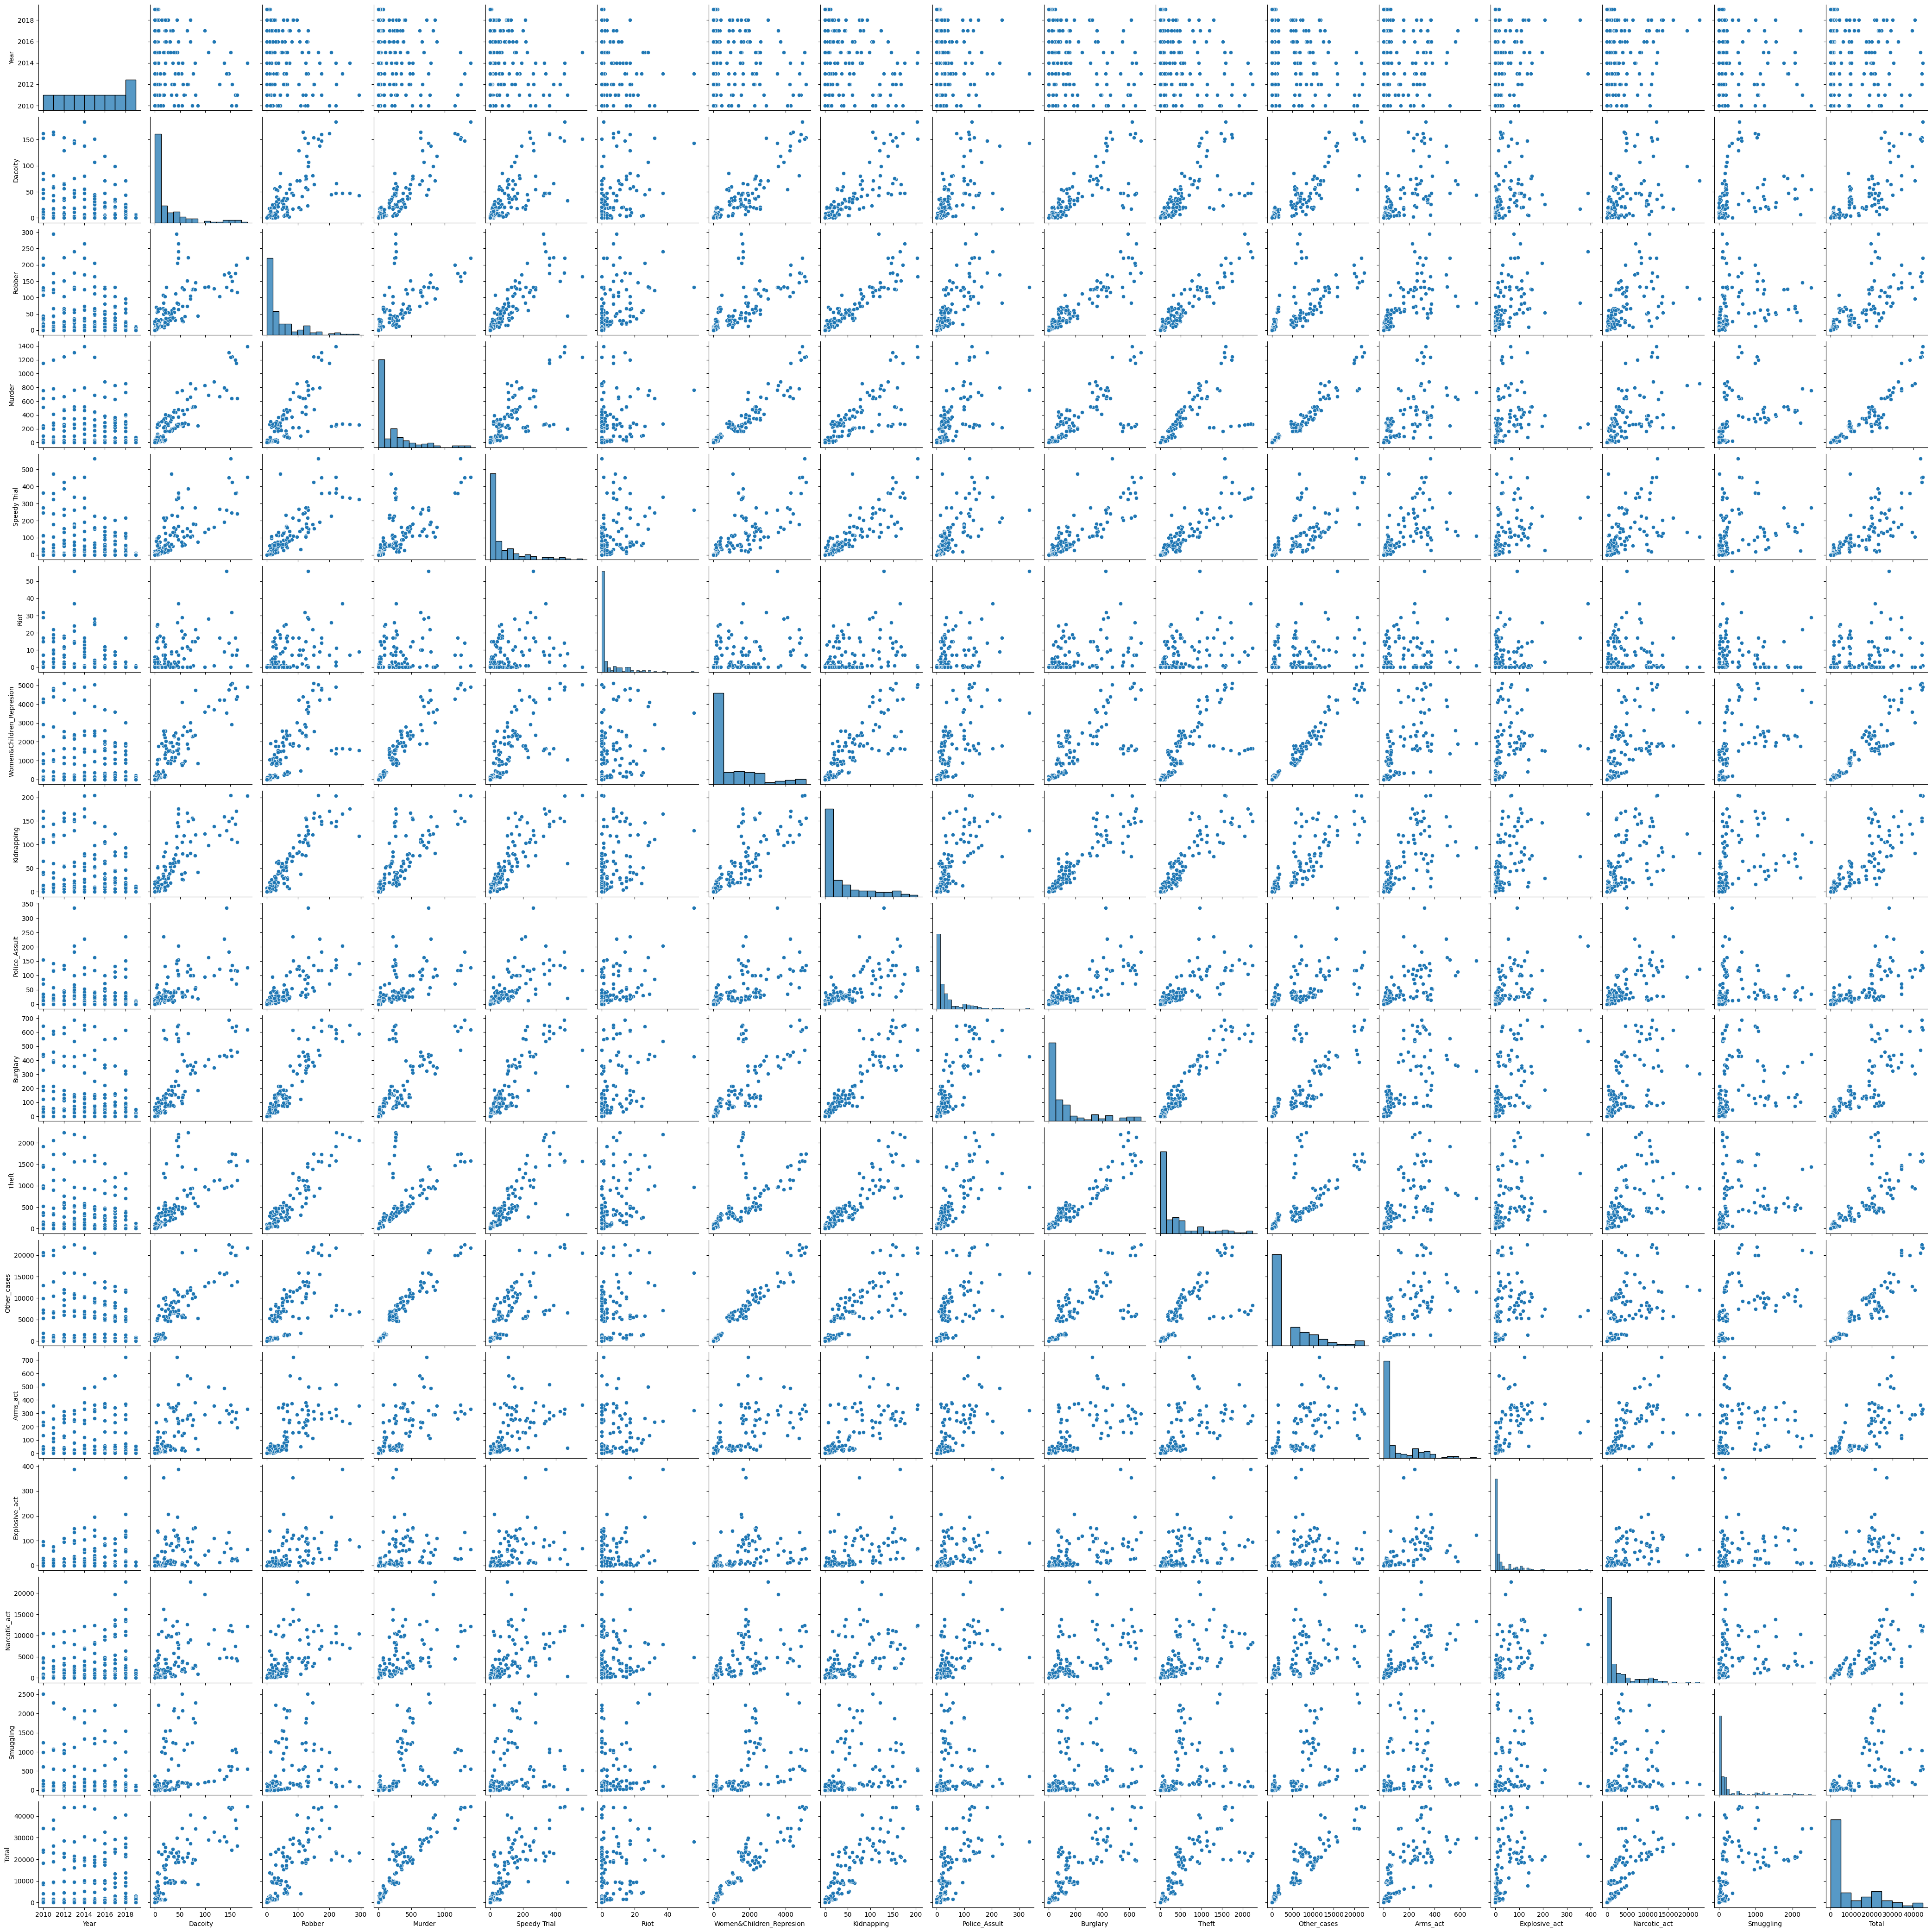

In [15]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.    **PClass** : From the histogram analysis it can be observed that the graph is left skewed . Also , mentionably high number of passengers boarded at class "3.

2.   **Fare** : In this dataset the data points from `Fare` column are highly right skewed. It can be observed that Most of the passengers had the tendency to buy tickets at a lower price.

3.  **Fare and PClass** : Fare for Passenger class 1 were relatively high when compared with class 2 and 3 .


 *This is just a sample analysis shown . You have to write all the observations you found* .




In [16]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      180 non-null    int64 
 1   Unit_Name                 180 non-null    object
 2   Dacoity                   180 non-null    int64 
 3   Robber                    180 non-null    int64 
 4   Murder                    180 non-null    int64 
 5   Speedy Trial              180 non-null    int64 
 6   Riot                      180 non-null    int64 
 7   Women&Children_Represion  180 non-null    int64 
 8   Kidnapping                180 non-null    int64 
 9   Police_Assult             180 non-null    int64 
 10  Burglary                  180 non-null    int64 
 11  Theft                     180 non-null    int64 
 12  Other_cases               180 non-null    int64 
 13  Arms_act                  180 non-null    int64 
 14  Explosive_act             

Year                         10
Unit_Name                    18
Dacoity                      66
Robber                       85
Murder                      109
Speedy Trial                 93
Riot                         29
Women&Children_Represion    132
Kidnapping                   75
Police_Assult                71
Burglary                    106
Theft                       130
Other_cases                 146
Arms_act                     94
Explosive_act                63
Narcotic_act                145
Smuggling                   111
Total                       147
dtype: int64

 **[FILLOUT] From the information above fill out the categorical column and numeric column names.**  <br>

Question: How do I know if the column have categorical data or not? <br>
Ans:  If the column datatype is "object" it's more likely to be categorical. Any data type other than "object might not be categorical column. <br>
In this dataset , the "Survived" column has datatype "int64". It might seem that the column has numeric data type . But if we oberserve carefully it is obvivous that the "Survived" column is categorical.  

Also, if the column has Very Few Unique values then also it's more likely to be categorical. Last, you use your intuition.
  
*DELETE THIS TEXT SECTION BEFORE SUBMITTING*

In [17]:
categorical_columns = ["Unit_Name" , "Year"]
numeric_columns = [ "Dacoity" , "Robber","Murder","Speedy Trial","Riot","Women&Children_Represion","Kidnapping","Police_Assult","Burglary","Theft","Other_cases","Arms_act","Explosive_act","Narcotic_act","Smuggling","Total"]

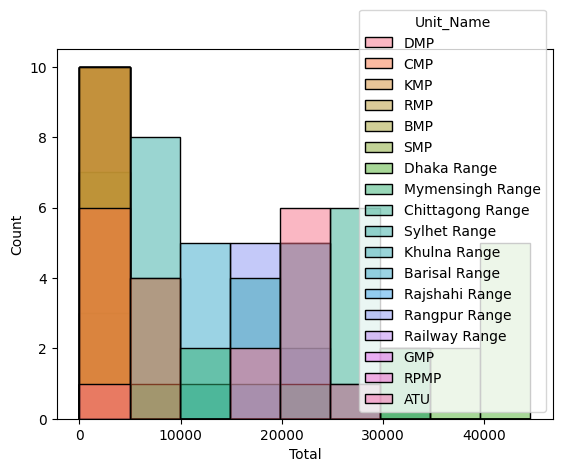

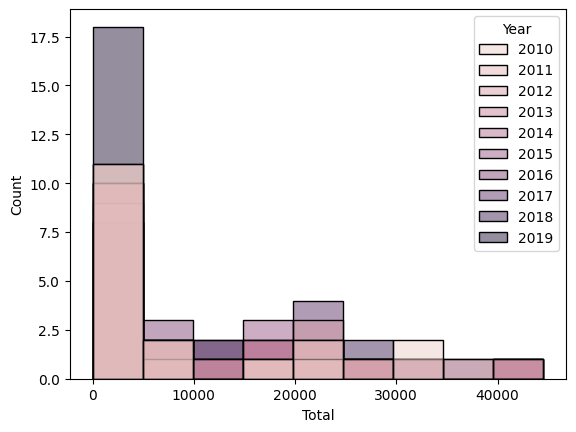

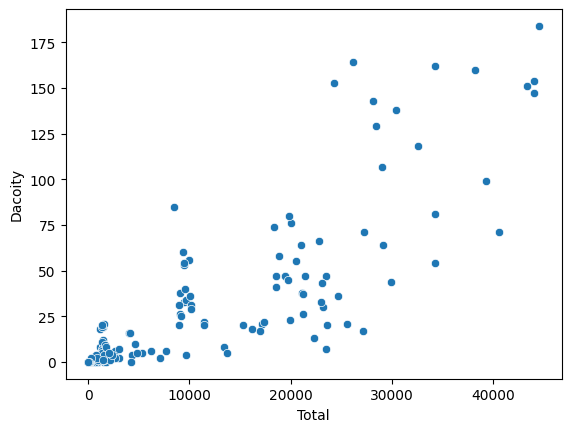

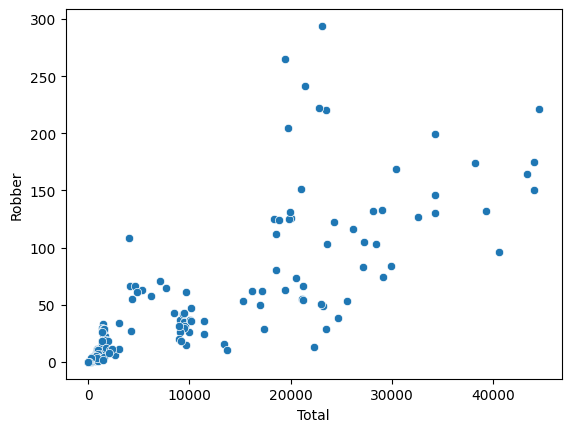

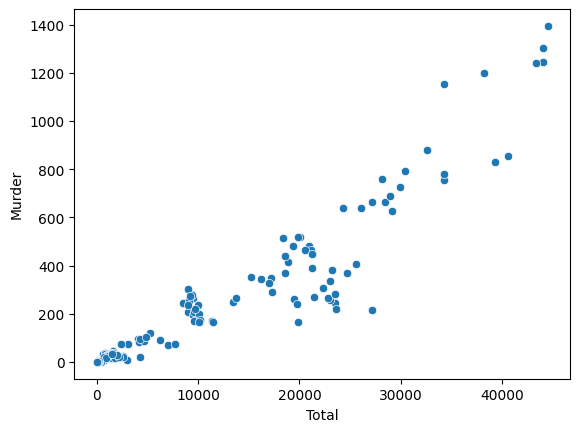

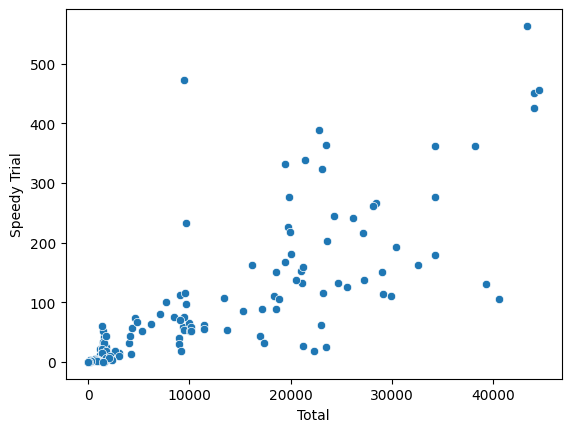

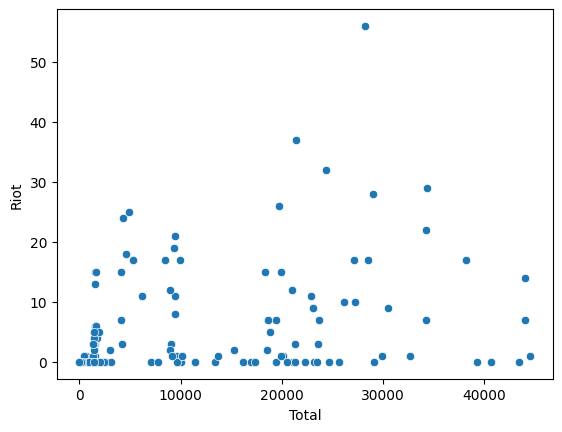

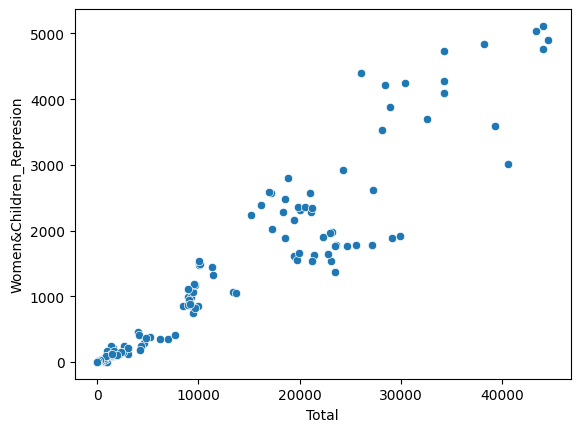

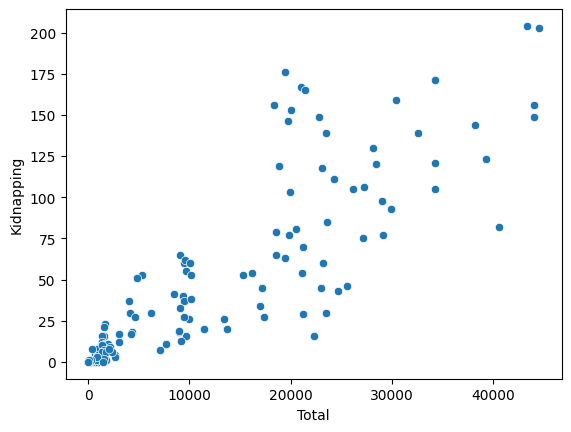

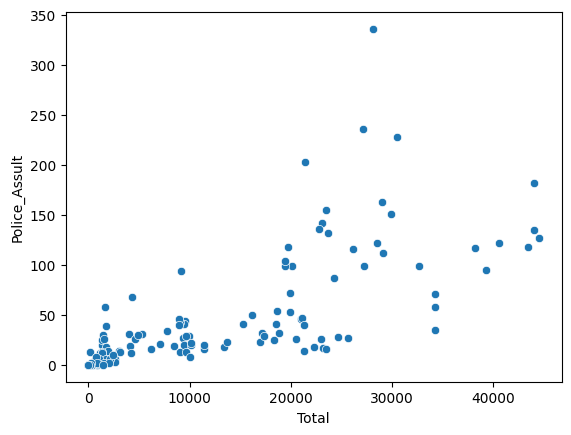

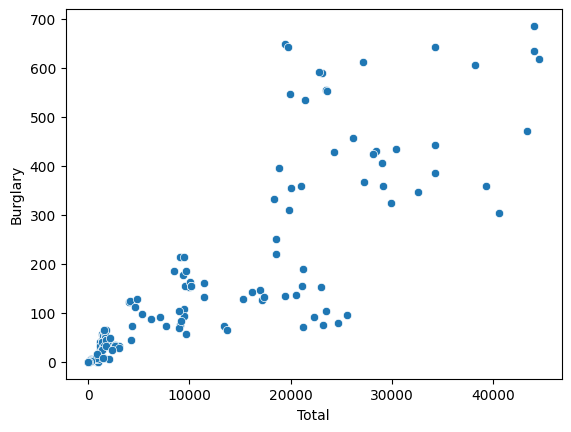

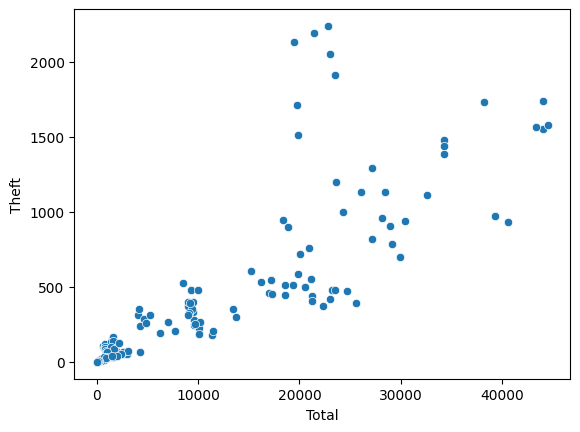

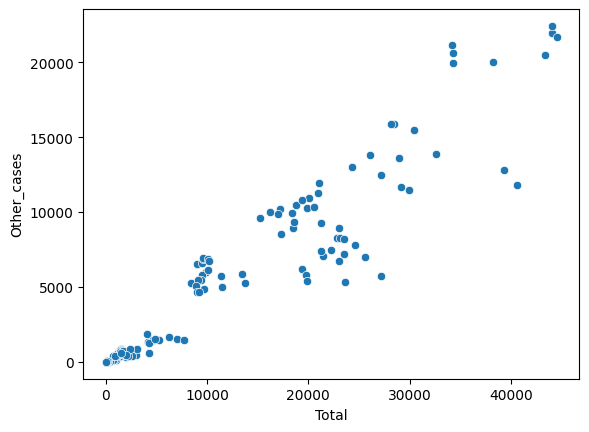

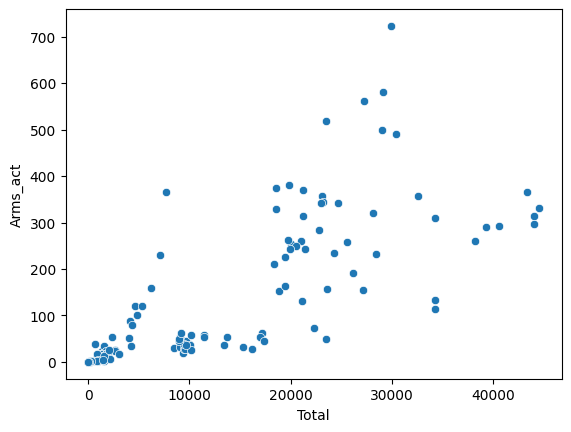

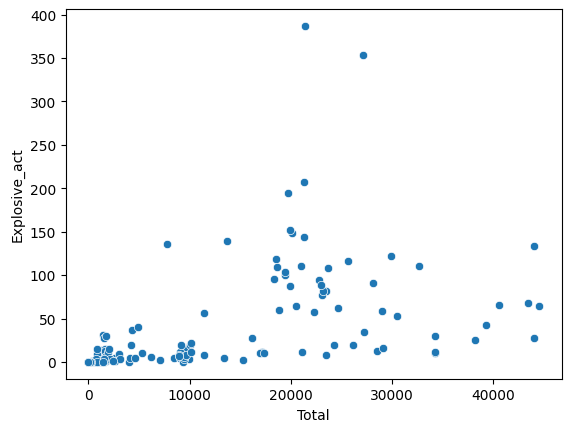

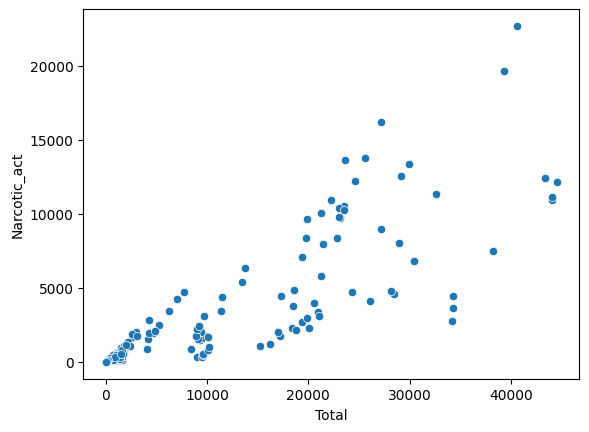

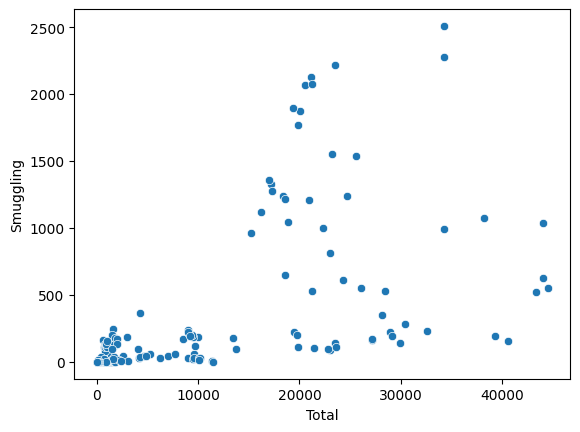

In [18]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



OBSERVATION

---



In [19]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      180 non-null    int64 
 1   Unit_Name                 180 non-null    object
 2   Dacoity                   180 non-null    int64 
 3   Robber                    180 non-null    int64 
 4   Murder                    180 non-null    int64 
 5   Speedy Trial              180 non-null    int64 
 6   Riot                      180 non-null    int64 
 7   Women&Children_Represion  180 non-null    int64 
 8   Kidnapping                180 non-null    int64 
 9   Police_Assult             180 non-null    int64 
 10  Burglary                  180 non-null    int64 
 11  Theft                     180 non-null    int64 
 12  Other_cases               180 non-null    int64 
 13  Arms_act                  180 non-null    int64 
 14  Explosive_act             

<Axes: >

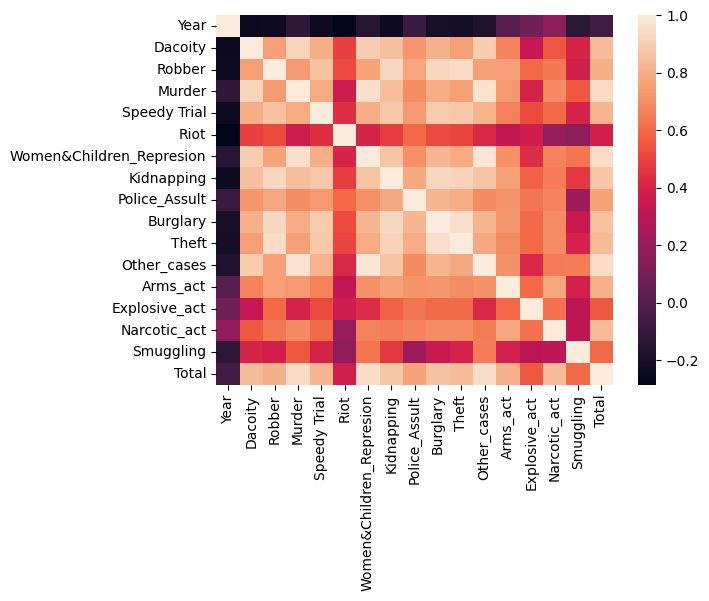

In [21]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION




Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [22]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [25]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)


In [26]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 6.39327491e+01  1.44458340e+02  8.23614706e+01  1.44637008e+02
  8.13352400e+01 -6.09602716e-01  1.33561773e+02  1.19097724e+01
  3.27328474e+01  1.15462124e+02  4.19507985e+01  2.54836501e+01
 -5.97708964e-01  5.43052352e-01  8.98121874e+01  5.15300265e-01
 -6.01673548e-01 -2.16067939e+00  1.44328226e+02  3.43911858e+01
  8.51619922e-02  1.13410208e+02 -2.15671480e+00  1.22044777e+02
  7.51987546e+01  4.26522192e+01  1.46182875e+02  1.14567854e+02
  4.35436352e+01  2.39453496e+01  7.88750682e+01  6.74361835e+01
  2.06925444e+01  1.18387544e+02  1.11446779e+02  7.27714913e+01
  7.86130764e+01  8.21684856e+01  9.86582809e+01  1.19420664e+00
  1.24547362e+02  3.90912838e+01  5.39087769e-01  1.09214586e+02
 -2.15275022e+00  1.36150777e+02  1.12946831e+02  3.74498379e+01
  2.68237241e+01  8.34777170e+01  1.87647569e+01  1.16733613e+02
  4.94041090e+01  1.47285451e+00]


In [27]:
print(regressor.coef_)

print(regressor.intercept_)

[ 0.00396458  0.2249806   0.0578437  -0.23007107 -0.18022243  0.04166127
 -0.01920829  0.10589872  0.16658714  0.09224406  0.18500048 -0.04763659
  0.51237782 -0.01239638  0.03771168  0.42856702  0.00552784]
-2.184466889639012


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

36.31777590989455

OBSERVATION


In [31]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  y_pred= clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test , y_pred )

0.2037037037037037

OBSERVATION

---